# Predictions based on third vector - v3

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)

In [2]:
model_data = pd.read_csv('learning_vectors/v03/version03-transfermarkt.csv', sep=',')
# model_data = model_data.set_index(['Match_id'])

# model_data = model_data.sort_values(['League_id', 'Date'])
# model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
#                       'H_age', 'A_age',
#                       'H_TMV', 'A_TMV']

print(model_data.shape)
# model_data.head()


(6080, 12)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison

In [4]:
features = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_v3.txt','w')

print(model_data[features].shape)
model_data[features].head()


(6080, 4)


,H_age,A_age,H_TMV,A_TMV
0,21.3,24.6,250.0,64.0
1,24.9,23.9,91.0,257.0
2,24.3,25.7,80.0,61.0
3,24.4,26.4,162.0,86.0
4,22.3,22.5,73.0,212.0


In [5]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



### Basic compraison: 

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR  	0.534211 	(0.016480)
LDA  	0.535033 	(0.004398)
KNN  	0.483388 	(0.006890)
CART  	0.414967 	(0.014831)
NB  	0.523849 	(0.009238)
SVM  	0.459539 	(0.019397)


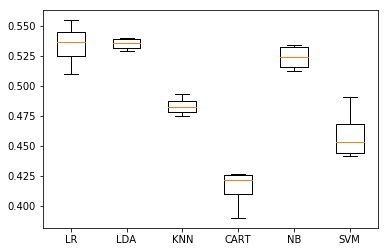

In [6]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR  	0.535855 	(0.005395)
LDA  	0.533882 	(0.006319)
KNN  	0.480263 	(0.010266)
CART  	0.416612 	(0.006317)
NB  	0.525658 	(0.014466)
SVM  	0.534539 	(0.009719)


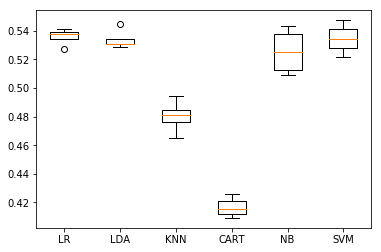

In [7]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)
